In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

from subset_select_ipot_non_uniform_git import subset_select_ipot as ss_ipot
from subset_select_non_uniform_entropic_FISTA_git import subset_select_non_uniform_FISTA as ss

from tensorflow import keras as keras
from numpy.random import default_rng
import torch

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"

from matplotlib.patches import Circle

from partial_relaxed_ot import p_rot as p_rot
from partial_relaxed_ot import compute_partial_reg_ot


import matplotlib.font_manager as font_manager

import cvxpy as cp
from matplotlib import cm
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib as mpl


from scipy.stats import entropy


c:\Users\bilal\anaconda3\envs\pytorch\lib\site-packages\ot\backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


(CVXPY) Oct 12 12:33:17 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

x_train_rep = np.load("x_training_CIFAR_10_incpetion_resnet.npy")
x_test_rep = np.load("x_testing_CIFAR_10_incpetion_resnet.npy")

y_train_pred = np.load("y_train_pred_CIFAR10_inception_resnet.npy")
y_test_pred = np.load("y_test_pred_CIFAR10_inception_resnet.npy")


In [3]:
# m = 512
# n = 512

# ints1 = [5]
# # ints1 = [5]


# cs = [1, 1.25, 1.5, 2, 4, 8, 16, 20, 30, 40, 49, 50]
# rho = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70]


# def normalize(a): return a/np.sum(a)


# def distmat(X, Y):
#     D = np.sum(X**2, 1)[None, :] + np.sum(Y**2, 1)[:, None] - 2*Y@X.T
#     return D.T


# # ones_n = np.ones([n, 1])
# # ones_m = np.ones([m, 1])
# gamma = 1
# largest_k = 10
# smallest_k = 10
# Weights_top_10 = np.zeros([len(ints1), len(cs), largest_k])
# weights_bottom_10 = np.zeros([len(ints1), len(cs), largest_k])

# rng = np.random.default_rng(42)
# y_idx_list = list(rng.choice(
#     [r for r in range(0, len(y_test))], n,  replace=False))
# Y = x_test_rep[y_idx_list]
# label_Y = y_test[y_idx_list]

# y_idx_sorted_lst_c_int = {}
# y_nu_idx_sorted_lst_c_int = {}
# annot_y_sorted_lst_c_int = {}

# for i in range(0, len(ints1)):
#     int1 = ints1[i]
#     print(int1)

#     rng = np.random.default_rng(1)
#     annot_Y = torch.zeros_like(torch.from_numpy(y_test))
#     annot_Y[y_test == int1] = 1

#     rng = np.random.default_rng(1)
#     x_idx_list = list(rng.choice(np.squeeze(np.argwhere(y_train == int1)), m,))
#     X = x_train_rep[x_idx_list]
#     label_X = y_train[x_idx_list]

#     annot_X = torch.ones_like(torch.from_numpy(y_train))

#     mu = np.ones([m, 1])/m
#     nu = np.ones([n, 1])/n

#     M = np.linalg.norm(X[:, np.newaxis, :] - Y, axis=2, ord=1)
#     M = M/np.max(M)
#     K = np.exp(-M/(gamma))

#     fig, axs = plt.subplots(len(cs), largest_k, figsize=(8.45, 10))
#     fig.subplots_adjust(wspace=0, hspace=0)

#     fig1, axs1 = plt.subplots(len(cs), largest_k, figsize=(8.45, 10))
#     fig1.subplots_adjust(wspace=0, hspace=0)

#     y_idx_sorted_lst_c = []
#     nu_idx_sorted_lst_c = []
#     annot_Y_sorted_lst_c = []

#     for l in range(0, len(cs)):
#         c = cs[l]
#         print("c=", c)

#         obj, P0, alph, bet = ss_ipot(
#             X, Y, mu, nu, c, gamma=gamma, max_outer_iter=10000, max_inner_iter=1, return_map=True)
#         print("sum(P)=", np.sum(P0))

#         P = np.copy(P0)
#         nu_hat = np.sum(P, axis=0)
#         zipped_sorted_nu_idx = sorted(
#             zip(nu_hat, np.squeeze(y_idx_list)), reverse=True)
#         nu_sorted, idx_sorted = list(zip(*zipped_sorted_nu_idx))

#         y_idx_sorted_lst_c.append(list(idx_sorted))
#         nu_idx_sorted_lst_c.append(list(nu_sorted))
#         annot_Y_sorted = annot_Y[list(idx_sorted)]
#         annot_Y_sorted_lst_c.append(annot_Y_sorted)

#         nu_idx_sorted_10 = list(nu_sorted)[0:largest_k]
#         nu_idx_sorted_desc = list(nu_sorted)[-largest_k:]
#         annot_Y_sorted = annot_Y[list(idx_sorted)]

#         Z = x_test[list(idx_sorted)[0:largest_k]]
#         Z1 = x_test[list(idx_sorted)[-largest_k:]]

#         annot_Z = annot_Y_sorted[0:largest_k]
#         annot_Z1 = annot_Y_sorted[-largest_k:]

#         Weights_top_10[i, l, :] = np.array(nu_idx_sorted_10)
#         weights_bottom_10[i, l, :] = np.array(nu_idx_sorted_desc)

#         for k in range(0, Z.shape[0]):
#             if k == 0:
#                 axs[l, k].imshow(np.squeeze(Z[k]))
#                 axs[l, k].set_xticks([])
#                 axs[l, k].set_yticks([])
#                 ylabel_str = "c={0}".format(c)
#                 axs[l, k].set_ylabel(
#                     ylabel_str, rotation='horizontal', ha='right', fontsize=16)

#                 axs1[l, k].imshow(np.squeeze(Z1[k]))
#                 axs1[l, k].set_xticks([])
#                 axs1[l, k].set_yticks([])
#                 ylabel_str = "c={0}".format(c)
#                 axs1[l, k].set_ylabel(
#                     ylabel_str, rotation='horizontal', ha='right', fontsize=16)

#                 if annot_Z[k] == 0:
#                     circ = Circle((16, 16), 15,  alpha=1.0,
#                                   edgecolor="red",
#                                   facecolor="none",
#                                   joinstyle="miter",
#                                   linewidth=3,)
#                     axs[l, k].add_patch(circ)

#                 if annot_Z1[k] == 1:
#                     circ = Circle((16, 16), 15,  alpha=1.0,
#                                   edgecolor="blue",
#                                   facecolor="none",
#                                   joinstyle="miter",
#                                   linewidth=3,)
#                     axs1[l, k].add_patch(circ)
#             else:
#                 axs[l, k].imshow(np.squeeze(Z[k]))
#                 axs[l, k].set_xticks([])
#                 axs[l, k].set_yticks([])

#                 axs1[l, k].imshow(np.squeeze(Z1[k]))
#                 axs1[l, k].set_xticks([])
#                 axs1[l, k].set_yticks([])

#                 if annot_Z[k] == 0:
#                     circ = Circle((16, 16), 15,  alpha=1.0,
#                                   edgecolor="red",
#                                   facecolor="none",
#                                   joinstyle="miter",
#                                   linewidth=3,)
#                     axs[l, k].add_patch(circ)

#                 if annot_Z1[k] == 1:
#                     circ = Circle((16, 16), 15,  alpha=1.0,
#                                   edgecolor="blue",
#                                   facecolor="none",
#                                   joinstyle="miter",
#                                   linewidth=3,)
#                     axs1[l, k].add_patch(circ)

#     y_idx_sorted_lst_c_int[str(int1)] = y_idx_sorted_lst_c
#     y_nu_idx_sorted_lst_c_int[str(int1)] = nu_idx_sorted_lst_c
#     annot_y_sorted_lst_c_int[str(int1)] = annot_Y_sorted_lst_c

#     # file_name1 = "CIFAR_10" + "_f_ipot_Fixed_Target_top="+str(int1)+".pdf"
#     # file_name2 = "CIFAR_10" + "_f_ipot_Fixed_Target_top="+str(int1)+".svg"
#     # file_name3 = "CIFAR_10" + "_f_ipot_Fixed_Target_top="+str(int1)+".png"

#     # file_name4 = "CIFAR_10" + "_f_ipot_Fixed_Target_bottom="+str(int1)+".pdf"
#     # file_name5 = "CIFAR_10" + "_f_ipot_Fixed_Target_bottom="+str(int1)+".svg"
#     # file_name6 = "CIFAR_10" + "_f_ipot_Fixed_Target_bottom="+str(int1)+".png"

#     # fig.savefig(file_name1, dpi=500, bbox_inches='tight', format='pdf')
#     # fig.savefig(file_name2, dpi=500, bbox_inches='tight', format='svg')
#     # fig.savefig(file_name3, dpi=500, bbox_inches='tight', format='png')

#     # fig1.savefig(file_name4, dpi=500, bbox_inches='tight', format='pdf')
#     # fig1.savefig(file_name5, dpi=500, bbox_inches='tight', format='svg')
#     # fig1.savefig(file_name6, dpi=500, bbox_inches='tight', format='png')


In [4]:
# from matplotlib import cm
# from sklearn import metrics
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# import matplotlib as mpl
# mpl.style.use('default')


# font1 = {'family': 'Times New Roman',
#          'size': 10}
# font2 = {'family': 'Times New Roman',
#          'size': 8}
# # from sklearn.metrics import RocCurveDisplay
# aucs_ints = {}
# entropies_ints = {}
# # cm = 1/2.54

# # cm_subsection = np.linspace(0, len(cs), 100*len(cs))
# # colors0 = [cm.jet(x) for x in cm_subsection]
# colors0 = mpl.cm.tab20(range(20))

# ints1 = [5]
# # ints1 = [5]
# for int in ints1:
#     fig, axs = plt.subplots(2, 2, figsize=(7.5, 8.5))
#     aucs = []
#     ents = []
#     y_idx_sorted_lst_c = y_idx_sorted_lst_c_int[str(int)]
#     nu_idx_sorted_lst_c = y_nu_idx_sorted_lst_c_int[str(int)]
#     annot_Y_sorted_lst_c = annot_y_sorted_lst_c_int[str(int)]
#     for i in range(len(cs)):
#         sorted_idx_lst = y_idx_sorted_lst_c[i]
#         nu_sorted = np.array(nu_idx_sorted_lst_c[i])
#         annot_Y_sorted = np.array(annot_Y_sorted_lst_c[i])
#         fpr, tpr, _ = roc_curve(annot_Y_sorted, nu_sorted, pos_label=1)
#         aucs.append(roc_auc_score(annot_Y_sorted, nu_sorted))
#         ents.append(-np.sum(np.log(nu_sorted**nu_sorted)))

#         aucs_ints[str(int)] = aucs
#         entropies_ints[str(int)] = ents

#         axs[0, 0].plot(fpr, tpr, linewidth=1, color=colors0[i], label="c="+str(cs[i]))
#         # axs.set_title("Subset Selection")
#         axs[0, 0].set_xlabel("False Positive", labelpad=0.01, **font1)
#         axs[0, 0].set_xlim([0, 1])
#         axs[0, 0].set_ylim([0, 1])
#         axs[0, 0].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
#         axs[0, 0].grid(True)
#         axs[0, 0].set_ylabel("True Positive", labelpad=0.01, **font1)
#         # axs[0].legend(loc=(0.50, 0.05), prop={'family': 'Times New Roman', 'weight': 'normal', 'size': 8}, ncol=2, frameon=True)
#         axs[0, 0].set_box_aspect(1)

#         axs[0, 1].plot(list(range(0, nu_sorted.size)),
#                     nu_sorted, linewidth=1, color=colors0[i])
#         axs[0, 1].set_xlabel("indices", labelpad=0.01, **font1)
#         axs[0, 1].set_xlim([0, nu_sorted.size])
#         axs[0, 1].set_ylim([0, 0.040])
#         axs[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#         # axs[1].set_yticks([ 0.2, 0.4, 0.6, 0.8, 1.0])
#         axs[0, 1].grid(True)
#         axs[0, 1].set_ylabel("$\\nu^{\downarrow}$", labelpad=0.01, **font1)
#         # axs[1].legend(loc=(0.55, 0.65), prop={'family': 'Times New Roman', 'weight': 'normal', 'size': 8}, ncol=2, frameon=True)
#         axs[0, 1].set_box_aspect(1)
        
        

#     axs[0, 0].tick_params(axis='both', which='major', labelsize=8)
#     axs[0, 1].tick_params(axis='both', which='major', labelsize=8)
#     fig.subplots_adjust(hspace=0.1, wspace=0.2)
    
#     colors1 = mpl.cm.tab10(range(20))
#     # fig1, axs1 = plt.subplots(1, 2, figsize=(7.5, 6.5))

#     # axs[1, 0].plot(cs, aucs_ints[str(int)],  color = "r", linewidth=1,linestyle='dotted', marker="s",  markersize=2)
#     # axs[1, 1].plot(cs, entropies_ints[str(int)], color = "b", linewidth=1, linestyle='dotted', marker=".", markersize=2)
    
#     axs[1,0].plot(cs, aucs, linewidth=1, color = "r", linestyle='dotted')
#     axs[1, 0].scatter(cs, aucs, marker="s", s=20, c=colors0[0:len(cs)])
    
#     axs[1, 1].plot(cs, entropies_ints[str(int)], color='b', linewidth=1, linestyle='dotted')
#     axs[1, 1].scatter(cs, entropies_ints[str(int)], marker="o", s=20, c=colors0[0:len(cs)])
    
    
#     axs[1, 0].grid(True)
#     axs[1, 1].grid(True)
#     axs[1, 0].set_xlabel("$c$", labelpad=0.01, **font1)
#     axs[1, 0].set_ylabel("AUC", labelpad=0.01, **font1)
#     axs[1, 0].tick_params(axis='both', which='major', labelsize=8)
#     # axs1[0].legend(loc=(0.55, 0.10), prop={'family': 'Times New Roman', 'weight': 'normal', 'size': 8}, ncol=2, frameon=True)
#     axs[1, 0].set_box_aspect(1)
#     axs[1, 0].set_ylim([0, 1])

#     axs[1, 1].set_xlabel("$c$", labelpad=0.01, **font1)
#     axs[1, 1].set_ylabel("$H(\\nu^{\downarrow})$", labelpad=0.01, **font1)
#     axs[1, 1].tick_params(axis='both', which='major', labelsize=8)
#     axs[1, 1].set_box_aspect(1)
#     # axs1[1].legend(loc=(0.55, 0.65), prop={'family': 'Times New Roman', 'weight': 'normal', 'size': 8}, ncol=2, frameon=True)

#     # fig.legend(loc=(0.33, 0.10), prop=font2, ncol=4, frameon=True)
#     # fig.legend(loc = (0.25,0.01), prop =font2, ncol=4, frameon=True)
#     # file_name1 = "CIFAR_10" + "ipot_AUROC_"+str(int)+".pdf"
#     # file_name2 = "CIFAR_10" + "ipot_AUROC_"+str(int)+".svg"
#     # file_name3 = "CIFAR_10" + "ipot_UROC_"+str(int)+".png"

#     # fig.savefig(file_name1, dpi=500, bbox_inches='tight', format='pdf')
#     # fig.savefig(file_name2, dpi=500, bbox_inches='tight', format='svg')
#     # fig.savefig(file_name3, dpi=500, bbox_inches='tight', format='png')


# # fig.subplots_adjust(hspace=0.1, wspace=0.2)
# # fig.legend(loc='lower center', prop=font2, ncol=5, frameon=True)
# # file_name4 = "CIFAR_10" + "fig2"+".pdf"
# # file_name5 = "CIFAR_10" + "fig2"+".svg"
# # file_name6 = "CIFAR_10" + "fig2"+".png"
# # fig1.savefig(file_name4, dpi=500, bbox_inches='tight', format='pdf')
# # fig1.savefig(file_name5, dpi=500, bbox_inches='tight', format='svg')
# # fig1.savefig(file_name6, dpi=500, bbox_inches='tight', format='png')


In [5]:
cs = np.linspace(0,32,60)

In [6]:
len(cs)

60

In [7]:
import cvxpy as cp
from matplotlib import cm
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib as mpl


from scipy.stats import entropy

gamma = 0.01
lambd = 1

m = 512
n = 512


# cs =  [1, 1.25, 1.5, 1.75, 2, 4, 8, 16, 20, 24, 28, 32]
cs = np.logspace(0,np.log10(60),32)
# rho = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70]
rho = np.logspace(-4,3, len(cs))

# cs =  [1, 1.25, 1.5, 2, 4, 8, 16, 20, 30, 40, 49, 50]
# rho = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70]
# rho = np.logspace(-3,3, len(cs))

int1 = [5]
print(int1)


rng = np.random.default_rng(1)
annot_Y = torch.zeros_like(torch.from_numpy(y_test))
annot_Y[y_test == int1] = 1

rng = np.random.default_rng(1)
x_idx_list = list(rng.choice(np.squeeze(np.argwhere(y_train == int1)), m,))
X = x_train_rep[x_idx_list]
label_X = y_train[x_idx_list]

annot_X = torch.ones_like(torch.from_numpy(y_train))

# ones_n = np.ones([n, 1])
# ones_m = np.ones([m, 1])
gamma = 1
largest_k = 10
smallest_k = 10
# Weights_top_10 = np.zeros([len(int1), len(cs), largest_k])
# weights_bottom_10 = np.zeros([len(int1), len(cs), largest_k])

rng = np.random.default_rng(42)
y_idx_list = list(rng.choice(
    [r for r in range(0, len(y_test))], n,  replace=False))
Y = x_test_rep[y_idx_list]
label_Y = y_test[y_idx_list]

y_idx_sorted_lst_c_int = {}
y_nu_idx_sorted_lst_c_int = {}
annot_y_sorted_lst_c_int = {}


C = np.linalg.norm(X[:, np.newaxis, :] - Y, axis=2, ord=1)
M = C/np.max(C)
K = np.exp(-M/(gamma))

ones_n = cp.Constant(np.ones([M.shape[1], 1]))
ones_m = cp.Constant(np.ones([M.shape[0], 1]))


def normalize_1(x): return x/np.sum(x)


m, n = M.shape
mu = np.ones([m, 1])/m
nu = np.ones([n, 1])/n

# mu = np.random.rand(m, 1)
# nu = np.random.rand(n, 1)
# mu = mu/mu.sum()
# nu = nu/nu.sum()


mu_cp = cp.Constant(mu.reshape([len(mu), 1]))
nu_cp = cp.Constant(nu.reshape([len(nu), 1]))
Mcp = cp.Constant(M)


# max_outer_iter = 2500
# max_inner_iter = 1


# Ls = [1, 2, 4, 8, 16, 32, 48, 80]
# cs = [1, 1.25, 1.5, 1.75, 2, 4, 8, 16]

csfont = {'fontsize': 14}
# plt.suptitle("Daily closing prices", fontsize=18, y=0.95)
# Xv = X.T
# Yv = Y.T
# num_c = 1000
# cs = np.linspace(1, 50, num=num_c, endpoint=True)
# rho = np.logspace(-3, 3, num=num_c)

min_costs_ss = []
min_costs_ipot = []
min_costs_tv = []
min_costs_l2 = []
min_costs_lifty = []
min_costs_lp = []


P_SS = []
P_ipot = []
P_tv = []
P_l2 = []
P_lifty = []
P_lp = []

alpha_ss = np.zeros([len(cs), m])
beta_ss = np.zeros([len(cs), n])
alpha_ipot = np.zeros([len(cs), m])
beta_ipot = np.zeros([len(cs), n])





labels = ["ss", "ss-ipot"]
for idx_c, c in enumerate(cs):
    print("c=", c)

    # # SS
    # P, obj, alph, bet = ss(mu, nu, c, K, M, gamma=gamma, Lt = 1/gamma, max_iter=10000, back_tracking=False, disp_iter=False)
    # P_SS.append(P)
    # min_costs_ss.append(np.sum(P*C))
    # alpha_ss[idx_c] = alph.squeeze()
    # beta_ss[idx_c] = bet.squeeze()

    # SS ipot

    _, P1, alph1, bet1 = ss_ipot(X, Y, mu, nu, c,  gamma=lambd, max_outer_iter=10000, max_inner_iter=1, wd=2, disp_iter=False, return_map=True)
    P_ipot.append(P1)
    min_costs_ipot.append(np.sum(P1*C))
    alpha_ipot[idx_c] = alph1.squeeze()
    beta_ipot[idx_c] = bet1.squeeze()

    ### L2 POT
    P2 = p_rot(mu, nu, C, penalty="l2", reg=1/rho[idx_c])
    min_costs_l2.append(np.sum(P2*C))
    P_l2.append(P2)

    ### L1 POT
    P3 = p_rot(mu, nu, C, penalty="l1", reg=1/rho[idx_c])
    min_costs_tv.append(np.sum(P3*C))
    P_tv.append(P3)

    # l2
    # Xp = cp.Variable(shape=(Mcp.shape[0], Mcp.shape[1]), nonneg=True)
    # objective0 = cp.Minimize(cp.sum(cp.multiply(Xp, Mcp)) + (1/rho[idx_c])*cp.norm(Xp.T@ones_m - nu_cp, 2))
    # constraints0 = [Xp@ones_n == mu_cp]
    # problem0 = cp.Problem(objective0, constraints0)
    # problem0.solve()
    # # P = Xp.value

    # min_costs_l2.append(np.sum(Xp.value*C))
    # P_l2.append(Xp.value)

    # linf
    # Xp = cp.Variable(shape=(Mcp.shape[0], Mcp.shape[1]), nonneg=True)
    # objective0 = cp.Minimize(
    #     cp.sum(cp.multiply(Xp, Mcp)) + (1/rho[idx_c])*cp.norm(Xp.T@ones_m - nu_cp, "inf"))
    # constraints0 = [Xp@ones_n == mu_cp]
    # problem0 = cp.Problem(objective0, constraints0)
    # problem0.solve()
    # P = Xp.value

    # min_costs_lifty.append(np.sum(Xp.value*C))
    # P_lifty.append(Xp.value)

    # # TV
    # Xp = cp.Variable(shape=(Mcp.shape[0], Mcp.shape[1]), nonneg=True)
    # objective0 = cp.Minimize(
    #     cp.sum(cp.multiply(Xp, Mcp)) + (1/rho[idx_c])*cp.norm(Xp.T@ones_m - nu_cp, 1))
    # constraints0 = [Xp@ones_n == mu_cp]
    # problem0 = cp.Problem(objective0, constraints0)
    # problem0.solve()
    # P = Xp.value

    # min_costs_tv.append(np.sum(Xp.value*C))
    # P_tv.append(Xp.value)

    # # LP
    # Xp = cp.Variable(shape=(Mcp.shape[0], Mcp.shape[1]), nonneg=True)
    # objective = cp.Minimize(cp.sum(cp.multiply(Xp, Mcp)))
    # constraints = [Xp@ones_n == mu_cp, Xp.T@ones_m <= c * nu_cp]

    # problem = cp.Problem(objective, constraints)

    # # Solve our problem
    # problem.solve()
    # min_costs_lp.append(np.sum(Xp.value*C))
    # P_lp.append(Xp.value)




[5]
c= 1.0
c= 1.141194625739198
c= 1.3023251738160282
c= 1.4862064893237183
c= 1.696050858354948
c= 1.9355241245350203
c= 2.2088097289079314
c= 2.520681791910186
c= 2.876588514126556
c= 3.2827473527843307
c= 3.746253636657057
c= 4.2752045168089605
c= 4.87884041851833
c= 5.567706465452298
c= 6.353836696067548
c= 7.250964290376788
c= 8.274761479604827
c= 9.443113329798763
c= 10.776430182212533
c= 12.298004208594627
c= 14.034416310166225
c= 16.01600046854825
c= 18.277373660543734
c= 20.858040594039682
c= 23.80308382936811
c= 27.163951342094492
c= 30.99935528543932
c= 35.37629765312335
c= 40.37124076029457
c= 46.07144299007141
c= 52.57648314031936
c= 60.0


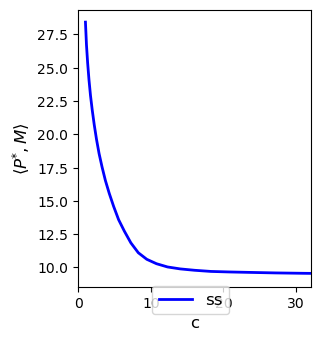

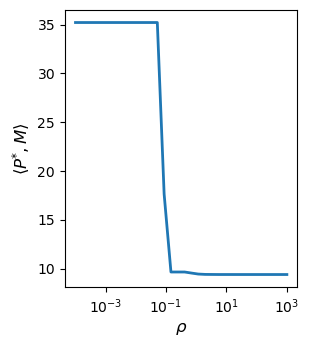

In [8]:
import matplotlib.font_manager as font_manager


font = font_manager.FontProperties(
    family="Times New Roman", weight='normal', style='normal', size=12)
csfont = {'fontsize': 12}


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3.6))
# axs.plot(cs,min_costs_ss, "r", linewidth=2, label=labels[0])
axs.plot(cs, min_costs_ipot, "b", linewidth=2, label=labels[1])
axs.set_xlabel("c", **csfont)
axs.set_ylabel("$\langle  \mathbf{\mathit{P}}^{*}, M  \\rangle$", **csfont)
axs.set_xlim(0, 32)
# axs.legend(fontsize = 12)
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure,
           loc='lower center',  bbox_to_anchor=(0.5, 0.01), fontsize=12)

plt.show()

fig1, axs1 = plt.subplots(nrows=1, ncols=1, figsize=(3, 3.6))
# axs1.plot(cs, min_costs_ss, "r", linewidth=2, label=labels[0])
axs1.semilogx(np.array(rho), min_costs_tv, linewidth=2, label="TV")
axs1.set_xlabel("$\\rho$", **csfont)
axs1.set_ylabel("$\langle  \mathbf{\mathit{P}}^{*}, M  \\rangle$", **csfont)
# axs1.set_xlim([1, 40])
# axs.legend(fontsize = 12)
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure,
           loc='lower center',  bbox_to_anchor=(0.5, 0.01), fontsize=12)

plt.show()


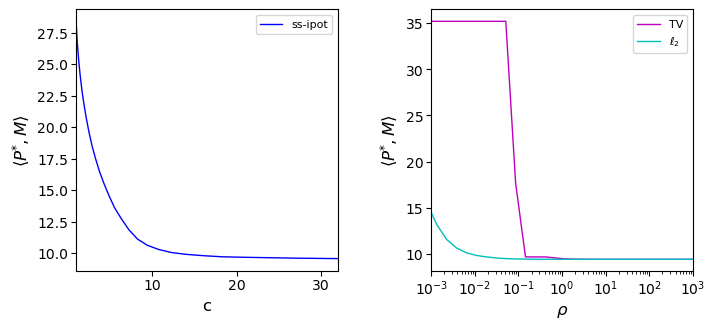

In [9]:
import matplotlib.font_manager as font_manager


font = font_manager.FontProperties(
    family="Times New Roman", weight='normal', style='normal', size=12)
csfont = {'fontsize': 14}
labels = ["ss-entropic", "ss-ipot", "ss-lp"]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.4, 3.4))


# axs[0].plot(cs, min_costs_ss, "r", linewidth=1, label=labels[0])
axs[0].plot(np.array(cs), min_costs_ipot, "b", linewidth=1, label=labels[1])
# axs[0].plot(np.array(cs), min_costs_lp, "g", linewidth=1, label=labels[2])
axs[0].set_xlabel("c", fontsize=12)
axs[0].set_ylabel(
    "$\langle  \mathbf{\mathit{P}}^{*}, M  \\rangle$", fontsize=12)
axs[0].set_xlim([1, 32])
axs[0].tick_params(axis='both', which='major', labelsize=10, pad=2)
# axs.set_xticks([1,20,40,60,80,100])
axs[0].legend(fontsize=8)
axs[0].set_box_aspect(1)
# fig.legend(labels, ncol=2, bbox_transform=fig.transFigure,
#         loc='lower center',  bbox_to_anchor=(0.5, 0.01), fontsize=12)

# plt.savefig('circle and square-SS_ipot_mincosts.png', bbox_inches='tight', dpi=500, format='png')
# plt.savefig('circle and square-SS_ipot_mincosts.pdf', bbox_inches='tight', dpi = 500, format='pdf')
# plt.savefig('circle and square-SS_ipot_mincosts.svg', bbox_inches='tight', dpi = 500, format='svg')

axs[1].semilogx(np.array(rho), min_costs_tv, "m", linewidth=1, label="TV")
axs[1].semilogx(np.array(rho), min_costs_l2, "c",linewidth=1, label="$\ell_{2}$")
# axs[1].plot(np.array(rho), min_costs_lifty, "y", linewidth=1, label="$\ell_{\infty}$")
axs[1].set_xlabel("$\\rho$", fontsize=12)
axs[1].set_ylabel("$\langle  \mathbf{\mathit{P}}^{*}, M  \\rangle$", fontsize=12)
axs[1].set_xlim([1e-3, 1e3])

axs[1].tick_params(axis='both', which='major', labelsize=10, pad=2)
# axs.set_xticks([1,20,40,60,80,100])
axs[1].legend(fontsize=8)
axs[1].set_box_aspect(1)


fig.savefig('CIFAR10-SS_comparisons_losses.png', bbox_inches='tight', dpi=100, format='png')
fig.savefig('CIFAR10-SS_comparisons_losses.pdf', bbox_inches='tight', dpi=100, format='pdf')
fig.savefig('CIFAR10-SS_comparisons_losses.svg', bbox_inches='tight', dpi=100, format='svg')

plt.show()


c:\Users\bilal\anaconda3\envs\pytorch\lib\site-packages\scipy\stats\_entropy.py:77: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


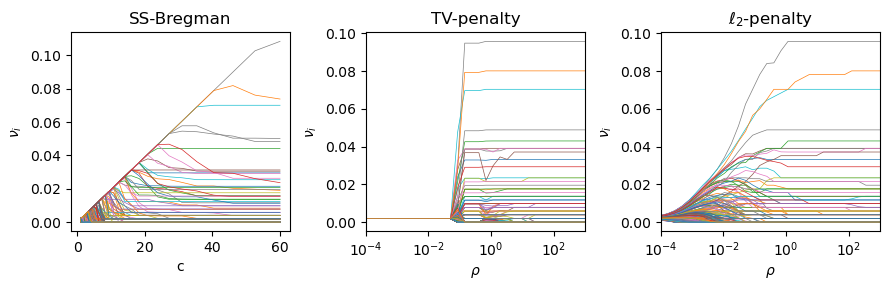

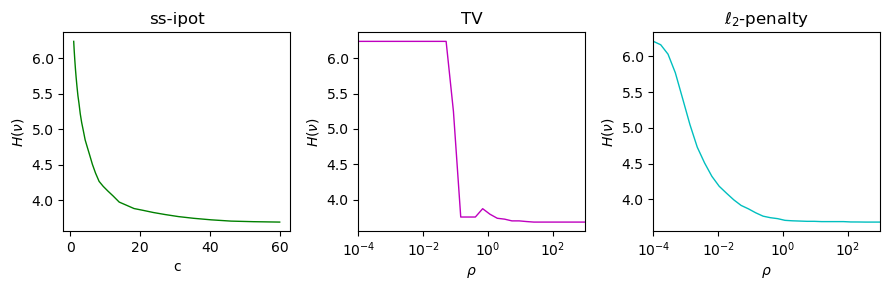

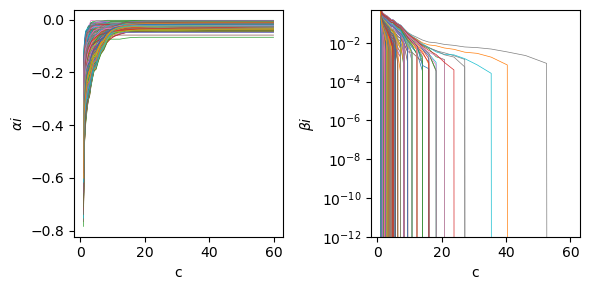

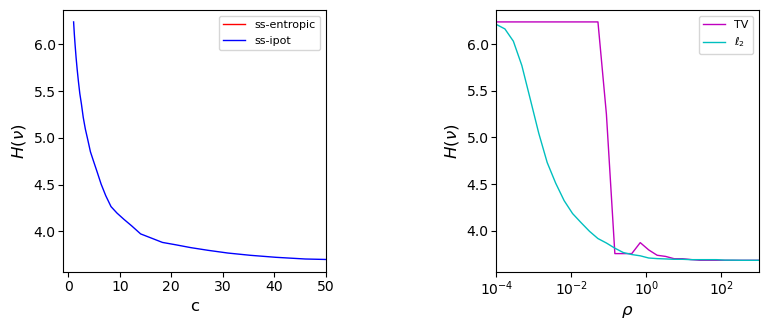

In [300]:
m, n = M.shape


threshold = 1e-8


nu_ss = np.zeros([len(cs), n])
nu_ipot = np.zeros([len(cs), n])
nu_lp = np.zeros([len(cs), n])
nu_tv = np.zeros([len(cs), n])
nu_l2 = np.zeros([len(cs), n])
nu_lifty = np.zeros([len(cs), n])

nu_ss_max = []
nu_ipot_max = []
nu_lp_max = []
nu_tv_max = []
nu_l2_max = []
nu_lifty_max = []

loss_ss = []
loss_ipot = []
loss_lp = []
loss_tv = []
loss_l2 = []
loss_lifty = []

card_ss = []
card_ipor = []
card_lp = []
card_tv = []
card_l2 = []
card_lifty = []

for c in range(0, len(cs)):
    # nu_ss[c] = np.sum(P_SS[c], axis=0)
    # nu_ss_max.append(np.max(nu_ss[c]))
    # loss_ss.append(np.sum(P_SS[c]*M))

    nu_ipot[c] = np.sum(P_ipot[c], axis=0)
    nu_ipot_max.append(np.max(nu_ipot[c]))
    loss_ipot.append(np.sum(P_ipot[c]*M))

    # nu_lp[c] = np.sum(P_lp[c], axis=0)
    # nu_lp_max.append(np.max(nu_lp[c]))
    # loss_lp.append(np.sum(P_lp[c]*M))

    nu_tv[c] = np.sum(P_tv[c], axis=0)
    nu_l2_max.append(np.max(nu_tv[c]))
    loss_l2.append(np.sum(P_tv[c]*M))

    nu_l2[c] = np.sum(P_l2[c], axis=0)
    nu_lifty_max.append(np.max(nu_l2))
    loss_lifty.append(np.sum(P_l2[c]*M))

    # nu_lifty[c] = np.sum(P_lifty[c], axis=0)
    # nu_lifty_max.append(np.max(nu_lifty[c]))
    # loss_lifty.append(np.sum(P_lifty[c]*M))


# nu_ss[nu_ss<threshold] = 0
nu_ipot[nu_ipot < threshold] = 0
# nu_lp[nu_lp<threshold] = 0
nu_tv[nu_tv < threshold] = 0
nu_l2[nu_l2 < threshold] = 0
# nu_lifty[nu_lifty<threshold] = 0


fig, axs = plt.subplots(1, 3, figsize=(9, 3))

m_slice = len(cs)


axs.flatten()[0].plot(cs[0:m_slice], nu_ipot[0:m_slice], linewidth=0.5)
# axs[1].plot(cs[0:m_slice], nu_ipot[0:m_slice]/nu.reshape([len(nu)]), linewidth=0.5)
axs.flatten()[0].set_xlabel("c")
axs.flatten()[0].set_ylabel("$\\nu_{i}$")
axs.flatten()[0].set_title("SS-Bregman")
# axs[1].set_yscale("log")

axs.flatten()[1].semilogx(rho[0:m_slice], nu_tv[0:m_slice], linewidth=0.5)
# axs[2].plot(cs[0:m_slice], nu_lp[0:m_slice]/nu.reshape([len(nu)]),linewidth=0.5)
axs.flatten()[1].set_xlabel("$\\rho$")
axs.flatten()[1].set_ylabel("$\\nu_{i}$")
axs.flatten()[1].set_title("TV-penalty")
axs.flatten()[1].set_xlim([1e-4, 1e3])
# axs[2].set_yscale("log")

axs.flatten()[2].semilogx(rho[0:m_slice], nu_l2[0:m_slice], linewidth=0.5)
# axs[2].plot(cs[0:m_slice], nu_lp[0:m_slice]/nu.reshape([len(nu)]),linewidth=0.5)
axs.flatten()[2].set_xlabel("$\\rho$")
axs.flatten()[2].set_ylabel("$\\nu_{i}$")
axs.flatten()[2].set_title("$\ell_{2}$-penalty")
axs.flatten()[2].set_xlim([1e-4, 1e3])


plt.tight_layout()

fig.savefig('CIFAR10-SS_comparisons_solution_paths.png', bbox_inches='tight', dpi=500, format='png')
fig.savefig('CIFAR10-SS_comparisons_solution_paths.pdf', bbox_inches='tight', dpi = 500, format='pdf')
fig.savefig('CIFAR10-SS_comparisons_solution_paths.svg', bbox_inches='tight', dpi=500, format='svg')


fig2, axs2 = plt.subplots(1, 3, figsize=(9, 3))
# m_slice = 200
# axs2.flatten()[0].plot(cs[0:m_slice], entropy(
#     nu_ss.T)[0:m_slice], 'r', linewidth=1)
# # axs[0].plot(cs[0:m_slice], nu_ss[0:m_slice]/nu.reshape([len(nu)]), linewidth=0.5)
# axs2.flatten()[0].set_xlabel("c")
# axs2.flatten()[0].set_ylabel("$H(\\nu$)")
# axs2.flatten()[0].set_title("ss-entropic")
# axs[0].set_yscale("log")

axs2.flatten()[0].plot(cs[0:m_slice], entropy(
    nu_ipot.T)[0:m_slice], 'g', linewidth=1)
# axs[1].plot(cs[0:m_slice], nu_ipot[0:m_slice]/nu.reshape([len(nu)]), linewidth=0.5)
axs2.flatten()[0].set_xlabel("c")
axs2.flatten()[0].set_ylabel("$H(\\nu$)")
axs2.flatten()[0].set_title("ss-ipot")
# axs[1].set_yscale("log")

# axs2.flatten()[2].plot(cs[0:m_slice], entropy(nu_lp.T)[0:m_slice], 'b', linewidth=1)
# # axs[2].plot(cs[0:m_slice], nu_lp[0:m_slice]/nu.reshape([len(nu)]),linewidth=0.5)
# axs2.flatten()[2].set_xlabel("c")
# axs2.flatten()[2].set_ylabel("$H(\\nu$)")
# axs2.flatten()[2].set_title("ss-lp")
# axs[2].set_yscale("log")

axs2.flatten()[1].semilogx(rho[0:m_slice], entropy(nu_tv.T)[0:m_slice], 'm', linewidth=1)
# axs[2].plot(cs[0:m_slice], nu_lp[0:m_slice]/nu.reshape([len(nu)]),linewidth=0.5)
axs2.flatten()[1].set_xlabel("$\\rho$")
axs2.flatten()[1].set_ylabel("$H(\\nu$)")
axs2.flatten()[1].set_title("TV")
axs2.flatten()[1].set_xlim([1e-4, 1e3])
# axs[2].set_yscale("log")

axs2.flatten()[2].semilogx(rho[0:m_slice], entropy(nu_l2.T)[0:m_slice], 'c',  linewidth=1)
# axs[2].plot(cs[0:m_slice], nu_lp[0:m_slice]/nu.reshape([len(nu)]),linewidth=0.5)
axs2.flatten()[2].set_xlabel("$\\rho$")
axs2.flatten()[2].set_ylabel("$H(\\nu$)")
axs2.flatten()[2].set_title("$\ell_{2}$-penalty")
axs2.flatten()[2].set_xlim([1e-4, 1e3])
# axs[2].set_yscale("log")

# axs2.flatten()[5].plot(rho[0:m_slice], entropy(nu_lifty.T)[0:m_slice], 'y', linewidth=1)
# # axs[2].plot(cs[0:m_slice], nu_lp[0:m_slice]/nu.reshape([len(nu)]),linewidth=0.5)
# axs2.flatten()[5].set_xlabel("$\\rho$")
# axs2.flatten()[5].set_ylabel("$H(\\nu$)")
# axs2.flatten()[5].set_title("$\ell_{\infty}$-penalty")
# axs[2].set_yscale("log")

plt.tight_layout()

fig2.savefig('CIFAR10-SS_entropies.png', bbox_inches='tight', dpi=500, format='png')
fig2.savefig('CIFAR10-SS_entropies.pdf', bbox_inches='tight', dpi = 500, format='pdf')
fig2.savefig('CIFAR10-SS_entropies.svg', bbox_inches='tight', dpi=500, format='svg')

fig1, axs1 = plt.subplots(1, 2, figsize=(6, 3))
# axs1[0, 0].plot(cs[0:m_slice], alpha_ss[0:m_slice], linewidth=0.5)
# axs1[0, 0].set_xlabel("c")
# axs1[0, 0].set_ylabel("$\\alpha_{i}$")
# axs1[0, 0].set_title("ss-entropic")

# axs1[0, 1].plot(cs[0:m_slice], alpha_ipot[0:m_slice], linewidth=0.5)
# axs1[0, 1].set_xlabel("c")
# axs1[0, 1].set_ylabel("$\\alpha_{i}$")
# axs1[0, 1].set_title("ss-ipot")

axs1[0].plot(cs[0:m_slice], alpha_ipot[0:m_slice], linewidth=0.5)
axs1[0].set_xlabel("c")
# axs1[0].set_ylim([1e-12, 5e-1])
axs1[0].set_ylabel("$\\alpha{i}$")
# axs1[0].set_title("ss-entropic")

axs1[1].semilogy(cs[0:m_slice], beta_ipot[0:m_slice], linewidth=0.5)
axs1[1].set_ylim([1e-12, 5e-1])
axs1[1].set_xlabel("c")
axs1[1].set_ylabel("$\\beta{i}$")
# axs1[1].set_title("ss-ipot")
plt.tight_layout()


fig1.savefig('CIFAR10-SS_comparisons_duals_solution_paths.png', bbox_inches='tight', dpi=500, format='png')
fig1.savefig('CIFAR10-SS_comparisons_duals_solution_paths.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig1.savefig('CIFAR10-SS_comparisons_duals_solution_paths.svg', bbox_inches='tight', dpi=500, format='svg')

##########################################################################################################
font = font_manager.FontProperties(
    family="Times New Roman", weight='normal', style='normal', size=12)
csfont = {'fontsize': 14}
labels = ["ss-entropic", "ss-ipot", "ss-lp"]
fig3, axs3 = plt.subplots(nrows=1, ncols=2, figsize=(9, 3.4))


axs3[0].plot(cs[0:m_slice], entropy(nu_ss.T)[0:m_slice],
             "r", linewidth=1, label=labels[0])
axs3[0].plot(cs[0:m_slice], entropy(nu_ipot.T)[0:m_slice],
             "b", linewidth=1, label=labels[1])
# axs3[0].plot(cs[0:m_slice], entropy(nu_lp.T)[0:m_slice], "g", linewidth=1, label=labels[2])
axs3[0].set_xlabel("c", fontsize=12)
axs3[0].set_ylabel("$H(\\nu$)", fontsize=12)
axs3[0].set_xlim([-1, 50])
axs3[0].tick_params(axis='both', which='major', labelsize=10, pad=2)
# axs.set_xticks([1,20,40,60,80,100])
axs3[0].legend(fontsize=8)
axs3[0].set_box_aspect(1)


axs3[1].semilogx(rho, entropy(nu_tv.T)[0:m_slice], "m", linewidth=1, label="TV")
axs3[1].semilogx(rho, entropy(nu_l2.T)[0:m_slice],"c", linewidth=1, label="$\ell_{2}$")
# axs3[1].plot(rho, entropy(nu_lifty.T)[0:m_slice], "y",linewidth=1, label="$\ell_{\infty}$")
axs3[1].set_xlabel("$\\rho$", fontsize=12)
axs3[1].set_ylabel("$H(\\nu$)", fontsize=12)
axs3[1].set_xlim([1e-4, 1e3])
axs3[1].tick_params(axis='both', which='major', labelsize=10, pad=2)
# axs.set_xticks([1,20,40,60,80,100])
axs3[1].legend(fontsize=8)
axs3[1].set_box_aspect(1)
plt.tight_layout()
# fig.legend(labels, ncol=2, bbox_transform=fig.transFigure,
#         loc='lower center',  bbox_to_anchor=(0.5, 0.01), fontsize=12)

fig3.savefig('CIFAR10-SS_entropies_c_comparisons.png', bbox_inches='tight', dpi=500, format='png')
fig3.savefig('CIFAR10-SS_entropies_c_comparisons.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig3.savefig('CIFAR10-SS_entropies_c_comparisons.svg', bbox_inches='tight', dpi=500, format='svg')
plt.show()


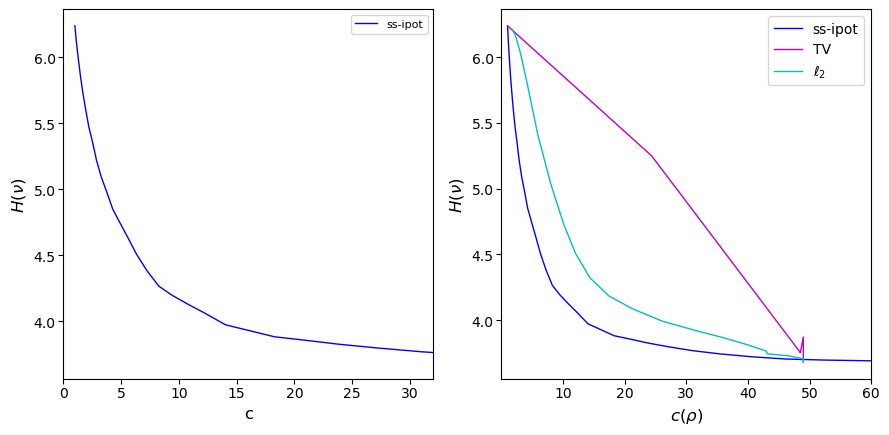

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

font = font_manager.FontProperties(
    family="Times New Roman", weight='normal', style='normal', size=12)
csfont = {'fontsize': 14}
labels = ["ss-entropic", "ss-ipot", "ss-lp"]
fig3, axs3 = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.4))


# axs3[0].plot(cs[0:m_slice], entropy(nu_ss.T)[0:m_slice],"r", linewidth=1, label=labels[0])
axs3[0].plot(cs[0:m_slice], entropy(nu_ipot.T)[0:m_slice],
             "b", linewidth=1, label=labels[1])
# axs3[0].plot(cs[0:m_slice], entropy(nu_lp.T)[0:m_slice], "g", linewidth=1, label=labels[2])
axs3[0].set_xlabel("c", fontsize=12)
axs3[0].set_ylabel("$H(\\nu$)", fontsize=12)
axs3[0].set_xlim([0, 32])
axs3[0].tick_params(axis='both', which='major', labelsize=10, pad=2)
# axs.set_xticks([1,20,40,60,80,100])
axs3[0].legend(fontsize=8)
axs3[0].set_box_aspect(1)


c_tv = np.max(nu_tv/nu.T, axis=1)
c_l2 = np.max(nu_l2/nu.T, axis=1)
c_lifty = np.max(nu_lifty/nu.T, axis=1)


# axs3[1].plot(cs[0:m_slice], entropy(nu_ss.T), "r", linewidth=1, label=labels[0])
axs3[1].plot(cs[0:m_slice], entropy(nu_ipot.T)[0:m_slice],
             "b", linewidth=1, label=labels[1])
# axs3[1].plot(cs[0:m_slice], entropy(nu_lp.T)[0:m_slice],"g", linewidth=1, label=labels[2])

axs3[1].plot(c_tv, entropy(nu_tv.T)[0:m_slice], "m", linewidth=1, label="TV")
axs3[1].plot(c_l2, entropy(nu_l2.T)[0:m_slice],
             "c", linewidth=1, label="$\ell_{2}$")
# axs3[1].plot(c_lifty, entropy(nu_lifty.T)[0:m_slice], "y", linewidth=1, label="$\ell_{\infty}$")
# axs3[1].axvline(2)
axs3[1].set_xlabel("$c$($\\rho$)", fontsize=12)
axs3[1].set_ylabel("$H(\\nu$)", fontsize=12)
axs3[1].set_xlim([1e-3, 60])
axs3[1].tick_params(axis='both', which='major', labelsize=10, pad=2)


# axins = axs3[1].inset_axes([1.2, 0, 0.6, 0.6], xlim=(
#     1, 3), ylim=(3.50, 4.45), xticklabels=[], yticklabels=[])
# # axins = zoomed_inset_axes( axs3[1], xlim=(1, 3), ylim=(3.50, 4.45), zoom=2, loc='lower left')
# axs3[1].indicate_inset_zoom(
#     axins, edgecolor="black", linestyle=":", linewidth=2)


# axins.plot(cs[0:m_slice], entropy(nu_ss.T[0:m_slice]),
#            "r", linewidth=1, label=labels[0])
# axins.plot(cs[0:m_slice], entropy(nu_ipot.T[0:m_slice]),
#            "b", linewidth=1, label=labels[1])
# axins.plot(cs[0:m_slice], entropy(nu_lp.T[0:m_slice]),
#            "g", linewidth=1, label=labels[2])
# axins.plot(c_tv, entropy(nu_tv.T[0:m_slice]), "m", linewidth=1, label="TV")
# axins.plot(c_l2, entropy(nu_l2.T[0:m_slice]),
#            "c", linewidth=1, label="$\ell_{2}$")
# axins.plot(c_lifty, entropy(
#     nu_lifty.T[0:m_slice]), "y", linewidth=1, label="$\ell_{\infty}$")


# axins.set_xlabel("$c(\\rho)$")
# axins.set_ylabel("$H(\\nu$)")


# axs.set_xticks([1,20,40,60,80,100])
# axs3[1].legend(fontsize=8)
axs3[1].legend(ncol=1, bbox_to_anchor=(1, 1))
axs3[1].set_box_aspect(1)
plt.tight_layout()


P_cstar = np.zeros_like(M)

row_idx = list(np.array(range(0, M.shape[0])))
P_cstar[row_idx, list(np.argmin(M, axis=1))] = mu.squeeze()
c_star = np.max(np.sum(P_cstar, axis=0)/nu.squeeze())

fig3.savefig('CIFAR10-SS_entropies_c_rho_comparisons.png', bbox_inches='tight', dpi=500, format='png')
fig3.savefig('CIFAR10-SS_entropies_c_rho_comparisons.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig3.savefig('CIFAR10-SS_entropies_c_rho_comparisons.svg', bbox_inches='tight', dpi=500, format='svg')

# axs3[1].axvline(c_star, color='r', linewidth=0.5)


In [44]:
P_cstar = np.zeros_like(M)

row_idx = list(np.array(range(0, M.shape[0])))
P_cstar[row_idx, list(np.argmin(M, axis=1))] = mu.squeeze()
c_star = np.max(np.sum(P_cstar, axis=0)/nu.squeeze())


In [292]:
c_star

49.0

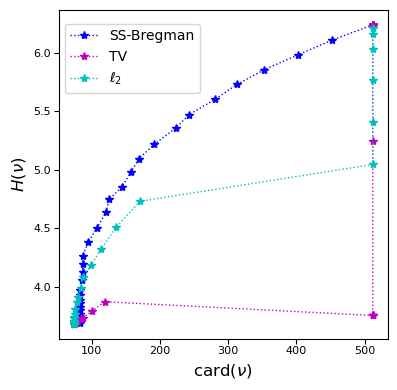

In [296]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

font = font_manager.FontProperties(
    family="Times New Roman", weight='normal', style='normal', size=12)
csfont = {'fontsize': 14}
labels = ["SS-Entropic", "SS-Bregman", "SS-LP"]
fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))


card_nu_ss = np.sum(nu_ss > threshold, axis=1)
card_nu_ipot = np.sum(nu_ipot > threshold, axis=1)
card_nu_lp = np.sum(nu_lp > threshold, axis=1)
card_nu_l2 = np.sum(nu_l2 > threshold, axis=1)
card_nu_tv = np.sum(nu_tv > threshold, axis=1)
card_nu_lifty = np.sum(nu_lifty > threshold, axis=1)


# axs3[0].plot(card_nu_ss[0:m_slice], entropy(nu_ss.T[0:m_slice]), "r", linewidth=1, label=labels[0])
# axs3[0].plot(card_nu_ipot[0:m_slice], entropy(nu_ipot.T[0:m_slice]),"b", linewidth=1, label=labels[1])
# axs3[0].plot(card_nu_lp[0:m_slice], entropy(nu_lp.T[0:m_slice]), "g", linewidth=1, label=labels[2])

# axs3[0].set_xlabel("card($\\nu$)", fontsize=12)
# axs3[0].set_ylabel("$H(\\nu$)", fontsize=12)
# axs3[0].set_xlim([-5, 80])
# axs3[0].tick_params(axis='both', which='major', labelsize=10, pad=2)
# # axs.set_xticks([1,20,40,60,80,100])
# axs3[0].legend(fontsize=8)
# axs3[0].set_box_aspect(1)


c_tv = np.max(nu_tv/nu.T, axis=1)
c_l2 = np.max(nu_l2/nu.T, axis=1)
c_lifty = np.max(nu_lifty/nu.T, axis=1)

# axs3[1].plot(card_nu_ss[0:m_slice], entropy(nu_ss.T[0:m_slice]), "r", linewidth=1, label=labels[0])
# axs3[1].plot(card_nu_ipot[0:m_slice], entropy(nu_ipot.T[0:m_slice]),"b", linewidth=1, label=labels[1])
# axs3[1].plot(card_nu_lp[0:m_slice], entropy(nu_lp.T[0:m_slice]), "g", linewidth=1, label=labels[2])

# axs3[1].plot(card_nu_tv, entropy(nu_tv.T[0:m_slice]), "m", linewidth=1, label="TV")
# axs3[1].plot(card_nu_l2, entropy(nu_l2.T[0:m_slice]), "c", linewidth=1, label="$\ell_{2}$")
# axs3[1].plot(card_nu_lifty, entropy(nu_lifty.T[0:m_slice]), "y", linewidth=1, label="$\ell_{\infty}$")

# axs3[1].axvline(2)
# axs3[1].set_xlabel("card($\\nu$)", fontsize=12)
# axs3[1].set_ylabel("$H(\\nu$)", fontsize=12)
# axs3[1].set_xlim([1, 80])
# axs3[1].tick_params(axis='both', which='major', labelsize=10, pad=2)


# axs3.plot(card_nu_ss[0:m_slice], entropy(nu_ss.T[0:m_slice]), "r", linewidth=1, label=labels[0])
axs3.plot(card_nu_ipot[0:m_slice], entropy(nu_ipot.T)[
          0:m_slice], ":*b", linewidth=1, label=labels[1])
# axs3.plot(card_nu_lp[0:m_slice], entropy( nu_lp.T[0:m_slice]), "g", linewidth=1, label=labels[2])

axs3.plot(card_nu_tv[0:m_slice], entropy(nu_tv.T)[
          0:m_slice], ":*m", linewidth=1, label="TV")
axs3.plot(card_nu_l2[0:m_slice], entropy(nu_l2.T)[
          0:m_slice], ":*c", linewidth=1, label="$\ell_{2}$")
# axs3.plot(card_nu_lifty, entropy(nu_lifty.T[0:m_slice]), "y", linewidth=1, label="$\ell_{\infty}$")

# axs3.axvline(2)
axs3.set_xlabel("card($\\nu$)", fontsize=12)
axs3.set_ylabel("$H(\\nu$)", fontsize=12)
# axs3.set_xlim([1, 80])
axs3.tick_params(axis='both', which='major', labelsize=8, pad=2)

axs3.legend(ncol=1, bbox_to_anchor=(0.45, 0.98))
axs3.set_box_aspect(1)
plt.tight_layout()

fig3.savefig('CIFAR10-SS_entropies_card_comparisons.png', bbox_inches='tight', dpi=500, format='png')
fig3.savefig('CIFAR10-SS_entropies_card_comparisons.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig3.savefig('CIFAR10-SS_entropies_card_comparisons.svg', bbox_inches='tight', dpi=500, format='svg')


###########################################################################################


# P_cstar  = np.zeros_like(M)

# row_idx = list(np.array(range(0, M.shape[0])))
# P_cstar[row_idx,list(np.argmin(M, axis=1))] = mu.squeeze()
# c_star = np.max(np.sum(P_cstar, axis=0)/nu.squeeze())

# axs3.axvline(c_star, color = 'r', linewidth=0.5)


# axins = axs3[1].inset_axes([1.2, 0, 0.6, 0.6], xlim=(
#     1, 3), ylim=(3.50, 4.45), xticklabels=[], yticklabels=[])
# # axins = zoomed_inset_axes( axs3[1], xlim=(1, 3), ylim=(3.50, 4.45), zoom=2, loc='lower left')
# axs3[1].indicate_inset_zoom(axins, edgecolor="black", linestyle=":", linewidth=2)


# axins.plot(card_nu_ss[0:m_slice], entropy(nu_ss.T[0:m_slice]), "r", linewidth=1, label=labels[0])
# axins.plot(card_nu_ipot[0:m_slice], entropy(nu_ipot.T[0:m_slice]),"b", linewidth=1, label=labels[1])
# axins.plot(card_nu_lp[0:m_slice], entropy(nu_lp.T[0:m_slice]), "g", linewidth=1, label=labels[2])

# axins.plot(card_nu_tv, entropy(nu_tv.T[0:m_slice]), "m", linewidth=1, label="TV")
# axins.plot(card_nu_l2, entropy(nu_l2.T[0:m_slice]), "c", linewidth=1, label="$\ell_{2}$")
# axins.plot(card_nu_lifty, entropy(nu_lifty.T[0:m_slice]), "y", linewidth=1, label="$\ell_{\infty}$")


# axins.set_xlabel("$c(\\rho)$")
# axins.set_ylabel("$H(\\nu$)")


# axs.set_xticks([1,20,40,60,80,100])
# axs3[1].legend(fontsize=8)
# axs3[1].legend(ncol = 2, bbox_to_anchor=(1, 0.7))
# axs3[1].set_box_aspect(1)
# plt.tight_layout()


# P_cstar  = np.zeros_like(M)

# row_idx = list(np.array(range(0, M.shape[0])))
# P_cstar[row_idx,list(np.argmin(M, axis=1))] = mu.squeeze()
# c_star = np.max(np.sum(P_cstar, axis=0)/nu.squeeze())

# axs3[1].axvline(c_star, color = 'r', linewidth=0.5)


In [16]:
auc_ss = []
auc_ipot = []
auc_lp = []
auc_tv = []
auc_l2 = []
auc_lifty = []


for c in range(0, len(cs)):
    auc_ss.append(roc_auc_score((label_Y == 5)*1, nu_ss[c]))
    auc_ipot.append(roc_auc_score((label_Y == 5)*1, nu_ipot[c]))
    auc_lp.append(roc_auc_score((label_Y == 5)*1, nu_lp[c]))
    auc_tv.append(roc_auc_score((label_Y == 5)*1, nu_tv[c]))
    auc_l2.append(roc_auc_score((label_Y == 5)*1, nu_l2[c]))
    auc_lifty.append(roc_auc_score((label_Y == 5)*1, nu_lifty[c]))


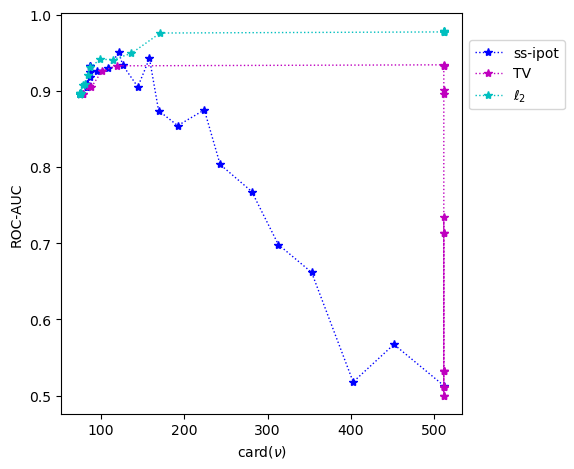

In [17]:
fig, ax = plt.subplots(1, 1)
m_slice = len(cs)
# ax.plot(card_nu_ss[0:m_slice], auc_ss[0:m_slice], ":r*", linewidth=1, label=labels[0])
ax.plot(card_nu_ipot[0:m_slice], auc_ipot, ":b*", linewidth=1, label=labels[1])
# ax.plot(card_nu_lp[0:m_slice], auc_lp, ":g*", linewidth=1, label=labels[2])

ax.plot(card_nu_tv, auc_tv, ":m*", linewidth=1, label="TV")
ax.plot(card_nu_l2, auc_l2, ":c*", linewidth=1, label="$\ell_{2}$")
# ax.plot(card_nu_lifty, auc_lifty, ":y*", linewidth=1, label="$\ell_{\infty}$")
ax.set_xlabel("card($\\nu$)")
ax.set_ylabel("ROC-AUC")

ax.legend(ncol=1, bbox_to_anchor=(1, 0.95))
ax.set_box_aspect(1)
plt.tight_layout()

fig.savefig('CIFAR10-SS_AUC_card_comparisons.png', bbox_inches='tight', dpi=500, format='png')
fig.savefig('CIFAR10-SS_AUC_card_comparisons.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig.savefig('CIFAR10-SS_AUC_card_comparisons.svg', bbox_inches='tight', dpi=500, format='svg')

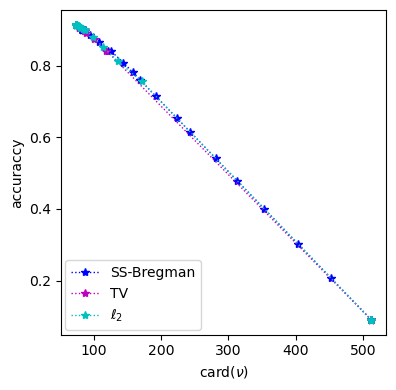

In [297]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
m_slice = len(cs)


precision_ss = []
precision_ipot = []
precision_lp = []
precision_tv = []
precision_l2 = []
precision_lifty = []

bs = np.sum((label_Y == int1)*1)

true_labels = (label_Y == int1[0])*1

for c_idx in range(0, len(cs)):
    
    # sorted_ss = sorted(zip(nu_ss[c_idx], annot_Y.numpy()), reverse = True)
    # _, b = zip(*sorted_ss)
    # precision_ss.append(np.sum(b[0:bs])/bs)
    
    # sorted_ipot = sorted(zip(nu_ipot[c_idx], true_labels), reverse = True)
    # _, b = zip(*sorted_ipot)
    # precision_ipot.append((b == true_labels).mean())
    
    
    y_ipot = np.zeros_like(nu_ipot[c_idx])
    y_ipot[nu_ipot[c_idx] > threshold] = 1
    precision_ipot.append(np.mean(y_ipot==true_labels))
    
    

    # sorted_lp= sorted(zip(nu_lp[c_idx], annot_Y.numpy()), reverse = True)
    # _, b = zip(*sorted_lp)
    # precision_lp.append(np.sum(b[0:bs])/bs)
    
    # sorted_tv= sorted(zip(nu_tv[c_idx], true_labels), reverse = True)
    # _, b = zip(*sorted_tv)
    # precision_tv.append((b == true_labels).mean())
    
    
    y_tv = np.zeros_like(nu_tv[c_idx])
    y_tv[nu_tv[c_idx] > threshold] = 1
    precision_tv.append(np.mean(y_tv==true_labels))
    
    
    
    # sorted_l2 = sorted(zip(nu_l2[c_idx], true_labels), reverse=True)
    # _, b = zip(*sorted_l2)
    # precision_l2.append((b == true_labels).mean())
    
    y_l2 = np.zeros_like(nu_l2[c_idx])
    y_l2[nu_l2[c_idx] > threshold] = 1
    precision_l2.append(np.mean(y_l2 == true_labels))
    
    # sorted_lifty = sorted(zip(nu_lifty[c_idx], annot_Y.numpy()), reverse=True)
    # _, b = zip(*sorted_lifty)
    # precision_lifty.append(np.sum(b[0:bs])/bs)
    
    

# ax.plot(card_nu_ss[0:m_slice], precision_ss[0:m_slice], ":r*", linewidth=1, label=labels[0])
ax.plot(card_nu_ipot[0:m_slice], precision_ipot[0:m_slice], ":b*", linewidth=1, label=labels[1])
# ax.plot(card_nu_lp[0:m_slice], precision_lp[0:m_slice], ":g*", linewidth=1, label=labels[2])

ax.plot(card_nu_tv, precision_tv[0:m_slice], ":m*", linewidth=1, label="TV")
ax.plot(card_nu_l2, precision_l2[0:m_slice], ":c*", linewidth=1, label="$\ell_{2}$")
# ax.plot(card_nu_lifty, precision_lifty[0:m_slice], ":y*", linewidth=1, label="$\ell_{\infty}$")
ax.set_xlabel("card($\\nu$)")
ax.set_ylabel("accuraccy")

ax.legend(ncol=1, bbox_to_anchor=(0.45, 0.25))
ax.set_box_aspect(1)
plt.tight_layout()

# ax.legend(ncol=1, bbox_to_anchor=(1, 0.95))
# ax.set_box_aspect(1)


fig.savefig('CIFAR10-SS_accuraccy_card_comparisons.png', bbox_inches='tight', dpi=500, format='png')
fig.savefig('CIFAR10-SS_accuraccy_card_comparisons.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig.savefig('CIFAR10-SS_accuraccy_card_comparisons.svg', bbox_inches='tight', dpi=500, format='svg')


In [269]:
np.sum(b[:bs])

33

In [270]:
label_Y.shape

(512,)

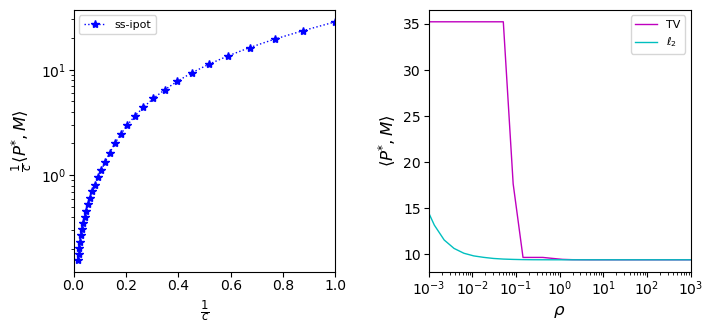

In [271]:
font = font_manager.FontProperties(
    family="Times New Roman", weight='normal', style='normal', size=12)
csfont = {'fontsize': 14}
labels = ["ss-entropic", "ss-ipot", "ss-lp"]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.4, 3.4))


# axs[0].semilogy(1/np.array(cs), 1/(np.array(cs))*min_costs_ss, ":r*", linewidth=1, label=labels[0])
axs[0].semilogy(1/np.array(cs), 1/(np.array(cs)) *
                min_costs_ipot, ":b*", linewidth=1, label=labels[1])
# axs[0].semilogy(1/np.array(cs), 1/(np.array(cs))*min_costs_lp, ":g*", linewidth=1, label=labels[2])
axs[0].set_xlabel("$\\frac{1}{c}$", fontsize=12)
axs[0].set_ylabel(
    "$\\frac{1}{c}\langle  \mathbf{\mathit{P}}^{*}, M  \\rangle$", fontsize=12)
axs[0].set_xlim([0, 1])
axs[0].tick_params(axis='both', which='major', labelsize=10, pad=2)
# axs.set_xticks([1,20,40,60,80,100])
axs[0].legend(fontsize=8)
axs[0].set_box_aspect(1)
# fig.legend(labels, ncol=2, bbox_transform=fig.transFigure,
#         loc='lower center',  bbox_to_anchor=(0.5, 0.01), fontsize=12)

# plt.savefig('circle and square-SS_ipot_mincosts.png', bbox_inches='tight', dpi=500, format='png')
# plt.savefig('circle and square-SS_ipot_mincosts.pdf', bbox_inches='tight', dpi = 500, format='pdf')
# plt.savefig('circle and square-SS_ipot_mincosts.svg', bbox_inches='tight', dpi = 500, format='svg')

axs[1].semilogx(np.array(rho), min_costs_tv, "m", linewidth=1, label="TV")
axs[1].semilogx(np.array(rho), min_costs_l2, "c", linewidth=1, label="$\ell_{2}$")
# axs[1].plot(np.array(rho), min_costs_lifty, "y", linewidth=1, label="$\ell_{\infty}$")
axs[1].set_xlabel("$\\rho$", fontsize=12)
axs[1].set_ylabel(
    "$\langle  \mathbf{\mathit{P}}^{*}, M  \\rangle$", fontsize=12)
axs[1].set_xlim([1e-3, 1e3])

axs[1].tick_params(axis='both', which='major', labelsize=10, pad=2)
# axs.set_xticks([1,20,40,60,80,100])
axs[1].legend(fontsize=8)
axs[1].set_box_aspect(1)
axs[1].set_box_aspect(1)


fig.savefig('CIFAR10-SS_comparisons_walmart.png', bbox_inches='tight', dpi=500, format='png')
fig.savefig('CIFAR10-SS_comparisons_walmart.pdf', bbox_inches='tight', dpi=500, format='pdf')
fig.savefig('CIFAR10-SS_comparisons_walmart.svg', bbox_inches='tight', dpi=500, format='svg')

plt.show()


In [289]:
precision_ipot

[0.08984375,
 0.20703125,
 0.302734375,
 0.400390625,
 0.478515625,
 0.541015625,
 0.615234375,
 0.65234375,
 0.71484375,
 0.759765625,
 0.78125,
 0.80859375,
 0.83984375,
 0.841796875,
 0.8671875,
 0.884765625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.8984375,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625,
 0.900390625]

In [ ]:
from scipy.interpolate import CubicSpline

def peak_c(c_list, costs):
    x = 1/c_list
    y = costs/c_list

    fig, axs = plt.subplots(1,3, figsize = (9,3) )
    axs[0].semilogy(x,y,'o')
    axs[0].set_title('1/c versus cost/c')

    y_1st = np.diff(y, n=1)
    step_scale = 10
    new_x = np.arange(x[0],x[-1],0.01/step_scale)
    y_1st_interp = np.interp(new_x.ravel(), x[:-1].ravel(), y_1st.ravel())
    axs[1].plot(new_x,y_1st_interp,'o')
    axs[1].set_title('1st derivative interpolated')
    
#    ratio = y_1st_interp[1:]/y_1st_interp[:-1] # from text
    ratio = (y_1st_interp[step_scale:]-y_1st_interp[:-step_scale])/y_1st_interp[:-step_scale] # from picture Figure 3

    ratio /= np.max(ratio)
    axs[2].plot(new_x[step_scale:],ratio,'o')
    axs[2].set_title('ratio')


    newest_x = new_x[step_scale:]

#    peaks = find_peaks(ratio,prominence=0.1)
#    print(peaks)
#    peak_1_c = np.min(newest_x[peaks[0]])
#    peak_1_c = np.min(newest_x[ratio>0.1])
    peak_1_c = newest_x[np.argmax(ratio)]
    c_peak = 1/peak_1_c
    return c_peak

In [287]:
from kneed import KneeLocator
def knee_c(c_list, costs):
    x = 1/c_list
    y = costs/c_list

    fig, axs = pl.subplots(3)
    axs[0].semilogy(x, y, 'o')
    axs[0].set_title('1/c versus cost/c')

    y_1st = np.diff(y, n=1)
    step_scale = 10
    new_x = np.arange(x[0], x[-1], 0.01/step_scale)
    y_1st_interp = np.interp(new_x.ravel(), x[:-1].ravel(), y_1st.ravel())
    axs[1].plot(new_x, y_1st_interp, 'o')
    axs[1].set_title('1st derivative interpolated')
    knee_1_c = KneeLocator(new_x, y_1st_interp, 1, curve="convex",
                           direction="increasing", online=True).knee
    return 1/knee_1_c


ModuleNotFoundError: No module named 'kneed'

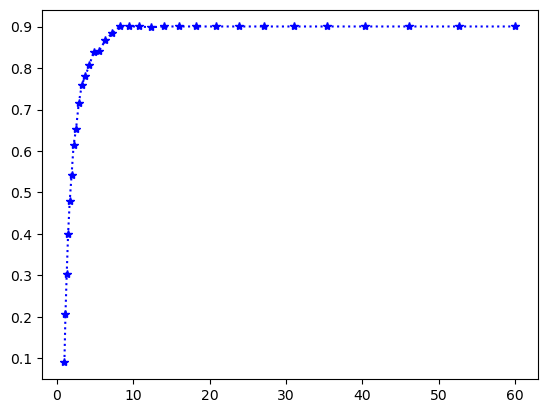

In [273]:
fig, axs = plt.subplots(1,1)
axs.plot(cs, precision_ipot, ":*b")

In [291]:
cs

array([ 1.        ,  1.14119463,  1.30232517,  1.48620649,  1.69605086,
        1.93552412,  2.20880973,  2.52068179,  2.87658851,  3.28274735,
        3.74625364,  4.27520452,  4.87884042,  5.56770647,  6.3538367 ,
        7.25096429,  8.27476148,  9.44311333, 10.77643018, 12.29800421,
       14.03441631, 16.01600047, 18.27737366, 20.85804059, 23.80308383,
       27.16395134, 30.99935529, 35.37629765, 40.37124076, 46.07144299,
       52.57648314, 60.        ])

In [290]:
min_costs_ipot

[28.423597968260502,
 26.715358244431815,
 25.363647786698245,
 24.09432764768814,
 22.906335045005125,
 21.814592222899147,
 20.71774483080501,
 19.623781518179943,
 18.55087943661091,
 17.552101495536988,
 16.527580102513618,
 15.563242659408546,
 14.585505263774948,
 13.581550010807652,
 12.726243135400834,
 11.844717414295944,
 11.102467003553633,
 10.608715556371564,
 10.27793988504569,
 10.034044083663069,
 9.888448244713864,
 9.785095983449978,
 9.697685334476658,
 9.657520308680926,
 9.623443213137115,
 9.586423536948551,
 9.5576230391939,
 9.533453345442416,
 9.515089125469672,
 9.501672682941495,
 9.496304189861467,
 9.496073997231282]

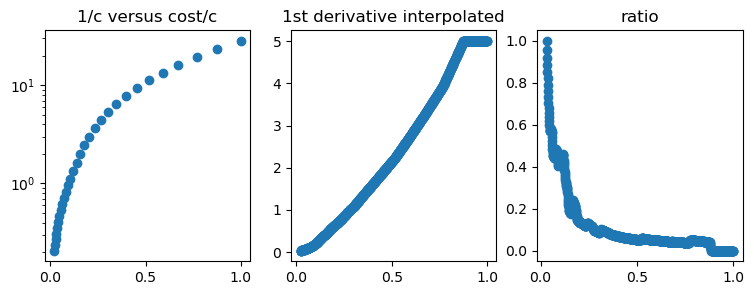

In [274]:
c_list_tt = np.flip(cs[cs<=c_star])
costs_tt = np.flip(np.array(min_costs_ipot)[cs<=c_star])
aa = peak_c(c_list_tt, costs_tt)

In [275]:
aa

31.540349055908834

In [276]:
aa

31.540349055908834

In [277]:
cs

array([ 1.        ,  1.14119463,  1.30232517,  1.48620649,  1.69605086,
        1.93552412,  2.20880973,  2.52068179,  2.87658851,  3.28274735,
        3.74625364,  4.27520452,  4.87884042,  5.56770647,  6.3538367 ,
        7.25096429,  8.27476148,  9.44311333, 10.77643018, 12.29800421,
       14.03441631, 16.01600047, 18.27737366, 20.85804059, 23.80308383,
       27.16395134, 30.99935529, 35.37629765, 40.37124076, 46.07144299,
       52.57648314, 60.        ])

In [278]:
cs[np.argmax(precision_ipot)]

8.274761479604827

In [279]:
np.argwhere(cs >= aa)


array([[27],
       [28],
       [29],
       [30],
       [31]], dtype=int64)

In [280]:
aa

31.540349055908834

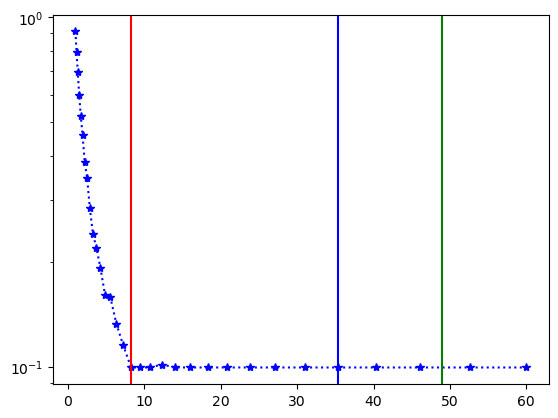

In [286]:
plt.semilogy(cs, 1-np.array(precision_ipot), "*:b")
plt.axvline(x=cs[np.argwhere(cs >= aa)[0].item()], color="b", label="phata")
plt.axvline(x=cs[np.argmax(precision_ipot)], color="r")
plt.axvline(x=c_star, color="g")


In [211]:
cs[27]

35.37629765312335

In [208]:
np.flip(min_costs_ipot)

array([ 9.496074  ,  9.49630419,  9.50167268,  9.51508913,  9.53345335,
        9.55762304,  9.58642354,  9.62344321,  9.65752031,  9.69768533,
        9.78509598,  9.88844824, 10.03404408, 10.27793989, 10.60871556,
       11.102467  , 11.84471741, 12.72624314, 13.58155001, 14.58550526,
       15.56324266, 16.5275801 , 17.5521015 , 18.55087944, 19.62378152,
       20.71774483, 21.81459222, 22.90633505, 24.09432765, 25.36364779,
       26.71535824, 28.42359797])

In [179]:
precision_ipot[29]

0.900390625

In [113]:
c_star

49.0

In [73]:
np.flip(cs)

array([60.        , 52.57648314, 46.07144299, 40.37124076, 35.37629765,
       30.99935529, 27.16395134, 23.80308383, 20.85804059, 18.27737366,
       16.01600047, 14.03441631, 12.29800421, 10.77643018,  9.44311333,
        8.27476148,  7.25096429,  6.3538367 ,  5.56770647,  4.87884042,
        4.27520452,  3.74625364,  3.28274735,  2.87658851,  2.52068179,
        2.20880973,  1.93552412,  1.69605086,  1.48620649,  1.30232517,
        1.14119463,  1.        ])

In [186]:
cs[cs<=c_star]

array([ 1.        ,  1.14119463,  1.30232517,  1.48620649,  1.69605086,
        1.93552412,  2.20880973,  2.52068179,  2.87658851,  3.28274735,
        3.74625364,  4.27520452,  4.87884042,  5.56770647,  6.3538367 ,
        7.25096429,  8.27476148,  9.44311333, 10.77643018, 12.29800421,
       14.03441631, 16.01600047, 18.27737366, 20.85804059, 23.80308383,
       27.16395134, 30.99935529, 35.37629765, 40.37124076, 46.07144299])

8.274761479604827

In [180]:
cs[29]

46.07144299007141

In [233]:
card_nu_ipot


array([512, 452, 403, 353, 313, 281, 243, 224, 192, 169, 158, 144, 126,
       121, 108,  95,  87,  87,  87,  86,  83,  83,  83,  83,  83,  83,
        83,  83,  83,  83,  83,  83])

37.5

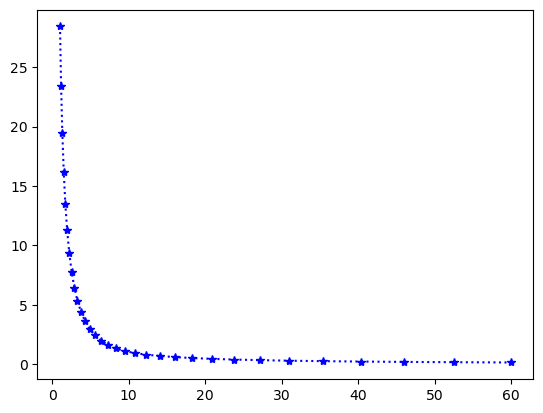

In [101]:
fig, axs = plt.subplots(1, 1)
axs.plot(cs, min_costs_ipot/cs, ":*b")

In [92]:
cs[cs>=aa]

array([40.37124076, 46.07144299, 52.57648314, 60.        ])

In [166]:
cs

array([ 1.        ,  1.14119463,  1.30232517,  1.48620649,  1.69605086,
        1.93552412,  2.20880973,  2.52068179,  2.87658851,  3.28274735,
        3.74625364,  4.27520452,  4.87884042,  5.56770647,  6.3538367 ,
        7.25096429,  8.27476148,  9.44311333, 10.77643018, 12.29800421,
       14.03441631, 16.01600047, 18.27737366, 20.85804059, 23.80308383,
       27.16395134, 30.99935529, 35.37629765, 40.37124076, 46.07144299,
       52.57648314, 60.        ])

In [167]:
c_star

49.0